In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transform
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
import skimage.io as io
%matplotlib inline

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
http://images.cocodataset.org/val2017/000000189820.jpg


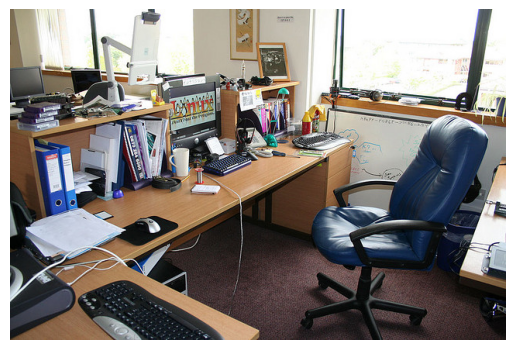

A blue office chair sitting next to a wooden desk.
a room with some office products in it
A view of a large, cluttered office desk area.
An unattended office containing several computers and a chair.
a desk in a room next to a couple of windows


In [7]:
captions_annFile = "annotations/captions_val2017.json"
coco_annotation_file_path = "annotations/instances_val2017.json"

coco = COCO(coco_annotation_file_path)
coco_caps = COCO(captions_annFile)
ids = list(coco.anns.keys())
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [15]:
resnet = models.resnet50(pretrained=True)
# Load with all the weights

In [16]:
children = list(resnet.children())
len(children)

10

In [17]:
children[-1]

Linear(in_features=2048, out_features=1000, bias=True)

In [18]:
children[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [19]:
modules = list(resnet.children())[:-1] # last layer Linear(in_features=2048, out_features=1000, bias=True)
resnet = nn.Sequential(*modules)
embed = nn.Linear(2048, 512)

In [20]:
I.shape

(427, 640, 3)

In [21]:
#Your image shape [480, 640, 3] seems to be in the format [height, width, channels], which is not compatible with the expected input format for ResNet.

#You need to reshape your input image into the expected format. In this case, you need to transpose the dimensions to match the [batch_size, channels, height, width] format. Here's how you can do it in PyTorch:e

In [22]:
img = torch.from_numpy(I)
img.shape

torch.Size([427, 640, 3])

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [24]:
img = img.permute(2, 0, 1)
img.shape


torch.Size([3, 427, 640])

In [25]:
img.to(device, dtype=torch.float32)

tensor([[[122., 121., 123.,  ..., 255., 255., 255.],
         [122., 122., 123.,  ..., 255., 255., 255.],
         [123., 124., 122.,  ..., 255., 255., 255.],
         ...,
         [ 12.,  22.,  38.,  ...,  24.,  29.,  31.],
         [ 46.,  57.,  69.,  ...,  27.,  34.,  34.],
         [ 74.,  85.,  95.,  ...,  31.,  36.,  37.]],

        [[106., 105., 107.,  ..., 255., 255., 255.],
         [106., 106., 107.,  ..., 255., 255., 255.],
         [107., 108., 106.,  ..., 255., 255., 255.],
         ...,
         [ 16.,  22.,  31.,  ...,  19.,  24.,  23.],
         [ 36.,  45.,  53.,  ...,  22.,  26.,  26.],
         [ 49.,  58.,  67.,  ...,  23.,  28.,  27.]],

        [[ 81.,  79.,  81.,  ..., 255., 255., 255.],
         [ 81.,  80.,  81.,  ..., 255., 255., 255.],
         [ 82.,  82.,  80.,  ..., 255., 255., 255.],
         ...,
         [ 17.,  20.,  23.,  ...,  15.,  20.,  20.],
         [ 27.,  33.,  37.,  ...,  18.,  23.,  23.],
         [ 27.,  37.,  43.,  ...,  20.,  25.,  25.]]]

In [26]:
# Add batch dimension (assuming single image)
img = img.float()
normalize = transform.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img = normalize(img)
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 427, 640])

In [27]:
feature = resnet(img)

In [28]:
feature.shape

torch.Size([1, 2048, 1, 1])

In [29]:
features = feature.view(feature.size(0), -1)
features.shape

torch.Size([1, 2048])

In [30]:
embed = nn.Linear(2048, 512)

In [31]:
features = embed(features)

In [32]:
features.shape # 1 is batch size(batch-size, H, W, C)

torch.Size([1, 512])

In [ ]:
features[0]

In [50]:
##lets play with rnn

http://images.cocodataset.org/val2017/000000255165.jpg


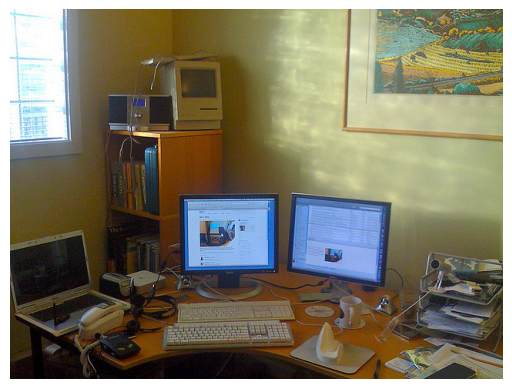

a desk filled with some paperwork, a laptop and a computer with two monitors
The computer desk has two monitors and two keyboards near a laptop. 
a desk with keyboards and a laptop and a pair of monitors
A desk with two computer monitor and a keyboard sitting on it.
A computer desk with two monitors and a laptop.


In [34]:

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [6]:
anns

[{'image_id': 11122,
  'id': 220823,
  'caption': 'A red stop sign behind a chain link fence.'},
 {'image_id': 11122,
  'id': 230342,
  'caption': 'A stop sign behind a green chain link fence.'},
 {'image_id': 11122,
  'id': 231281,
  'caption': 'A gated grassy noel has a shorted stop sign stuck in part of the land.'},
 {'image_id': 11122,
  'id': 234728,
  'caption': 'The stop sign is behind the fence instead of on the street.'},
 {'image_id': 11122,
  'id': 235178,
  'caption': 'a stop sign is in grass behind a fence'}]

In [8]:
from collections import Counter
from nltk.tokenize import word_tokenize
for ann in anns:
    print(ann)
    Counter.update(word_tokenize(ann['caption'].lower()))

{'image_id': 11122, 'id': 220823, 'caption': 'A red stop sign behind a chain link fence.'}
{'image_id': 11122, 'id': 230342, 'caption': 'A stop sign behind a green chain link fence.'}
{'image_id': 11122, 'id': 231281, 'caption': 'A gated grassy noel has a shorted stop sign stuck in part of the land.'}
{'image_id': 11122, 'id': 234728, 'caption': 'The stop sign is behind the fence instead of on the street.'}
{'image_id': 11122, 'id': 235178, 'caption': 'a stop sign is in grass behind a fence'}


In [18]:
cap_dataset = []
for ann in anns:
    caption = word_tokenize(ann["caption"])
    cap_dataset.append(caption)

In [20]:
cap_dataset

[['A', 'red', 'stop', 'sign', 'behind', 'a', 'chain', 'link', 'fence', '.'],
 ['A', 'stop', 'sign', 'behind', 'a', 'green', 'chain', 'link', 'fence', '.'],
 ['A',
  'gated',
  'grassy',
  'noel',
  'has',
  'a',
  'shorted',
  'stop',
  'sign',
  'stuck',
  'in',
  'part',
  'of',
  'the',
  'land',
  '.'],
 ['The',
  'stop',
  'sign',
  'is',
  'behind',
  'the',
  'fence',
  'instead',
  'of',
  'on',
  'the',
  'street',
  '.'],
 ['a', 'stop', 'sign', 'is', 'in', 'grass', 'behind', 'a', 'fence']]

In [28]:
for ann in anns:
    caption = ann["caption"].lower()
    tokens = word_tokenize(caption)
    Counter.update(tokens)

In [36]:
word2idx = {word: idx for idx, (word, _) in enumerate(Counter.items(), start=1)}
word2idx['<pad>'] = 0

TypeError: unbound method dict.items() needs an argument

In [27]:
word2idx = {word: idx for idx, (word, _) in enumerate(Counter.items(), start=1)}
word2idx['<pad>'] = 0

TypeError: unbound method dict.items() needs an argument

In [17]:
for cap in anns:
    print(cap)

{'image_id': 11122, 'id': 220823, 'caption': 'A red stop sign behind a chain link fence.'}
{'image_id': 11122, 'id': 230342, 'caption': 'A stop sign behind a green chain link fence.'}
{'image_id': 11122, 'id': 231281, 'caption': 'A gated grassy noel has a shorted stop sign stuck in part of the land.'}
{'image_id': 11122, 'id': 234728, 'caption': 'The stop sign is behind the fence instead of on the street.'}
{'image_id': 11122, 'id': 235178, 'caption': 'a stop sign is in grass behind a fence'}


In [ ]:
coco

In [35]:
embed = nn.Embedding(10, 512)

In [ ]:
embed(cap_dataset[0])

In [39]:
type(embed)

torch.nn.modules.sparse.Embedding